#RMS Titanic - A Statistical Investigation Using Python

In this study, we will use a few packages in Python to carry out a statistical study of a dataset of the passengers of the Titanic. Those are as follows:

 - Pandas - built on top of NumPy, which provides means of manipulating tables and time series.
 - NumPy - enables complex mathematical operations on arrays
 - Matplotlib.pyplot - used for data visualisation in Python
 - Seaborn - used for data visualisation, it is easier to get a nice visual from, but allows for less flexibility than matplotlib.
 - Scipy.stats - used for carrying out the statistical tests on the data.

Using the command !wget which uses some "notebook magic" - we are able to extract our dataset in question and can assign it to a dataframe which we can 
Using the command !wget which uses some "notebook magic" - we are able to extract our dataset in question and can assign it to a dataframe which we can aptly call **titanic**.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

!wget "https://raw.githubusercontent.com/stmball/PracticalPython/main/Data%20Visualisation/titanic.csv"

titanic = pd.read_csv("./titanic.csv", index_col=0)

--2022-02-28 11:33:24--  https://raw.githubusercontent.com/stmball/PracticalPython/main/Data%20Visualisation/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K  --.-KB/s    in 0.004s  

2022-02-28 11:33:25 (11.0 MB/s) - ‘titanic.csv’ saved [44225/44225]



---
#Section 1

#Initial exploration

In this section, we will take our first steps with familiarising ourselves with the Titanic dataset, before we delve into more detailed analysis. 

Which features are recorded in the dataset?

We can use the ".head()" method of pandas to take a quick look at the dataset's first five entries. We could pass an argument (an integer in this case) within those brackets to change the default number of items. 

Using this method, we can see the columns and five inputs for those respective columns, including the following information: 

 - Whether the passenger survived (0 for no, 1 for yes, as these have been provided as boolean inputs) 
 - The class the passenger travelled in (3 for 3rd, 2 for 2nd, 1 for 1st)
 - The passenger's name and sex as a text input
 - The passenger's age as a float (a number which contains values after the decimal place)
 - Two columns detailing the number of relatives the passenger travelled with
 - The fare paid by the passenger, in GBP. This goes to more than two decimal places, as the currency still used imperial units at this point. 

In [ ]:
titanic.head()

,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Survived,,,,,,,
0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


---
We can use the .info() method on the dataframe we have imported to both count up the number of entries and the data types for each of them. We can see a total of 887 entries, with each of the columns having 887 non-null values, and none of the data types are not what we would expect. (If a value was "null", it would be a missing value for the fields in question, and would present a problem in terms of how we should treat those entries)

For example, if the Pclass was an "object", we would anticipate there would be an anomalous text input for one or more of the entries, causing the column to appear as a different data type. 

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 0
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pclass                   887 non-null    int64  
 1   Name                     887 non-null    object 
 2   Sex                      887 non-null    object 
 3   Age                      887 non-null    float64
 4   Siblings/Spouses Aboard  887 non-null    int64  
 5   Parents/Children Aboard  887 non-null    int64  
 6   Fare                     887 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 55.4+ KB


---
Now that we have reviewed missing data and the data types themselves, we can also review the rest of the data for anomalous inputs. 

By resetting the index (which had defaulted to "Survived"), we can view that column in the describe() method. This will allow us to receive key stats about the data itself, including the number of entries, the mean (average) value of the column, the standard deviation (how dispersed the values are with respect to the mean value) and finally, the lowest, highest and quartile values for each of the columns. 

Examples of what we might review as anomalous in this context could include:

- Negative values for any of the fields
- Survived values which are not between 0 and 1
- Pclass values which are not betwen 1 and 3
- Extreme values for the other fields. e.g: An age above 120.

Most of the data does not stand out, though the maximum fare value of over £512 would be worth £64,000 by today's standards, which did seem anomalous and worth looking into a bit further. 

There were three passengers who paid this figure in our data, and there is a source which corroborated that figure:
https://www.encyclopedia-titanica.org/titanic-survivor/annie-moore-ward.html

*(It did come to light that the £512 figure was for a group of four - and that this dataset has both aggregated that figure, and contains only three of that group in question - so were this a more practical application of statistics, we would need to do a lot more digging for the additional passenger data and splitting out the fares which have been amalgamated in this way! For the purpose of this study, we will use this data as is and draw conclusions with the knowledge that the data is partial and somewhat uncleansed!)*

On this basis, we now have comfort that we are working with a valid dataset for some exploratory data analysis. 

In [ ]:
titanic = titanic.reset_index()
titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


---
We can use methods on the dataframe in the below format to provide simple information about the data, such as the average age by itself. 

In [ ]:
titanic["Age"].mean()

29.471443066516347

---
What is the probability of a randomly selected passenger surviving?

We might not want to provide an answer to quite so many decimal places, since it probably not too enlightening to the reader to see a messy figure like the above one when "29.5" would provide the message to the reader more clearly.

To do this, we can write a query such as the one below, which compares the group size of the people who survived on the titanic (Survived = 1) to the total size of the group, and save it to a variable, called "probability".

Then, by using an "f string" or "formatted string" in second line, we can return the probability output which would look like the previous answer in a more clean format - in this case, a percentage with one decimal place. 

In [ ]:
probability = len(titanic[titanic["Survived"] == 1]) / len(titanic)
print(f"{probability:.1%}")

38.6%


---
#Section 2

#Fares Paid & Passenger Ages

We will next investigate the fares paid, and whether the age of the passenger in question had an impact. Notably, was it cheaper to ride the Titanic if you were a child?

We can easily query the data frame with a condition whether the age is under 18, and use the relevant entries' Fare column as our basis for calculating an average, similarly to before. In this case, the answer has been set to give four significant figures.

In [ ]:
child_fare = titanic[titanic["Age"] < 18]["Fare"].mean()
print(f"{child_fare:.4}")

31.06


---
Next, doing exactly the same type of query, but in this case we will look at passengers over the age of 18. It does look like the averages differ by just shy of £1.5 - this isn't the biggest difference, and doesn't really provide any major insights about the fare structure.




In [ ]:
adult_fare = titanic[titanic["Age"] >= 18]["Fare"].mean()
print(f"{adult_fare:.4}")

32.52


---
To gather some further insights about the fares and the ages of the passengers, we can create histograms to observe how the data is distributed. The code is split in two sections - first defining the figure itself, and then the underlying graphs in the figure.

**Code - Section 1**

We begin by specifying the figure and axes, where the figure is the full graph, and each axes refers to a portion of the graph. In this case, there will be two rows and one column, for a total of two graphs in the figure. The dimension of the whole figure is determined by "**figsize**", and the ratio of the underlying axes in this case has been set to be equal. ([2, 2]) Finally, the "**sharex**" property being set to false means that each of the histograms will have a different x axis - the age and fares have entirely different ranges of values. 

**Code - Section 2**

The histograms are defined with the column in question for the first argument, then the "bins" argument refers to how many portions the graph is split up into. These graphs have 80 bins for the age (1 per year), and 52 bins for the fare paid. (1 per £10 bracket) Density will plot the height of the bars based on the count of entries in each bin. The colour is set to c (cyan), and the alpha value determines the opacity of the bars, where 0 is invisible, and 1 is opaque. 0.7 is a good value to be clearly visible whilst not drowning out the gridlines.

We can add labels (**set_xlabel/set_ylabel**), titles (**set_title**) and define what numbers appear along each axis of the graph. (**set_xlim/set_ylim**) For ease of reading, setting grid to true gives us gridlines, and using the tight_layout() method conuter-intuitively spaces the graph components out more neatly. (Without it, the axis label of the first graph would overlap with the title of the second graph.)

**Graphs**

We can see that the age histogram is quite widely spread - there is a general peak around the 18-30 age range which trails off as the age goes up, and under 18s appear to be mostly made up of younger children. Each bar on this graph corresponends to 1% of passengers per 0.01 unit on the y axis. 

The fare histogram is quite simple in comparison - it is both unimodal and positively skewed. There is a single peak on the left, and it trails off. The majority of passengers paid £40. Each bar on this graph corresponds to 10% of passengers per 0.01 unit on the y axis. 


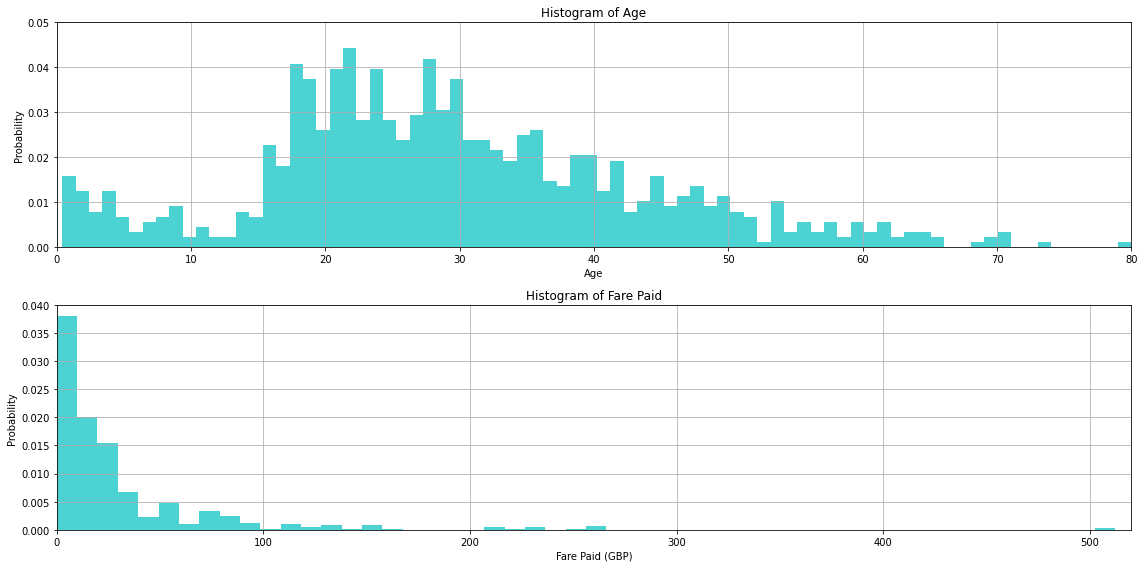

In [ ]:
# Section 1
fig, (ax1, ax2) = plt.subplots(nrows=2, 
                               ncols=1, 
                               figsize=(16, 8), 
                               gridspec_kw={'height_ratios': [2, 2]},
                               sharex=False)

# Section 2
n, bins, patches = ax1.hist(titanic["Age"], bins=80, density=True, facecolor='c', alpha=0.7)

ax1.set_xlabel('Age')
ax1.set_ylabel('Probability')
ax1.set_title('Histogram of Age')
ax1.set_xlim(0, 80)
ax1.set_ylim(0, 0.05)
ax1.grid(True)

n, bins, patches = ax2.hist(titanic["Fare"], bins=52, density=True, facecolor='c', alpha=0.7)

ax2.set_xlabel('Fare Paid (GBP)')
ax2.set_ylabel('Probability')
ax2.set_title('Histogram of Fare Paid')
ax2.set_xlim(0, 520)
ax2.set_ylim(0, 0.04)
ax2.grid(True)

fig.tight_layout()
fig.show()

---
Although we have been able to look at the underlying distributions for age/fare paid, it is not yet clear how much of a correlation there is between those values. By plotting a scatter graph, strong correlations can be highlighted with ease.

**First Graph**

The variables to be used on each axis are defined, and the area of each point to be 25 pixels in total. The alpha is 0.3 - this is clear enough to see individual points, but will help to determine if a lot of points are stacked together, as multiple points stacked together will show with an opaque hue.

Looking at the graph itself, it is hard to tell that there is a correlation of any kind, and there are areas of the graph which are extremely clustered. It is hard to determine just how many data points are stacked in these areas.  

**Second Graph**

We can use a logarithmic scale in the y axis to resolve this issue. One key use of this scale is to respond to skewness towards large values, situations where a small number of points are larger than the bulk of the data. We have a significant amount of data under the £20 mark taking up about 4% of the space, and a few points over £100 taking up over 80% of the space. ***(This is not intentional social commentary.)***

We can re-use the variables and format of the original graph, with the addition of specifying a "log" scale (**plt.yscale**) with the points clearly labelled on the axis using **yticks** - the graph does come out with the axis figures a bit clustered between 8 to 10 and 80 to 100, which serves to demonstrate the exponential nature of the axis well, but we may prefer to use less points on the axis when presenting this. 

Looking at the graph, there is still no clear correlation between the age and the price paid for a ticket. We can see the congested area of the graph somewhat more clearly - though there is still a large amount of data around the £8 price point for 18-32 year olds, it is clearer where other data points on the graph lie. 

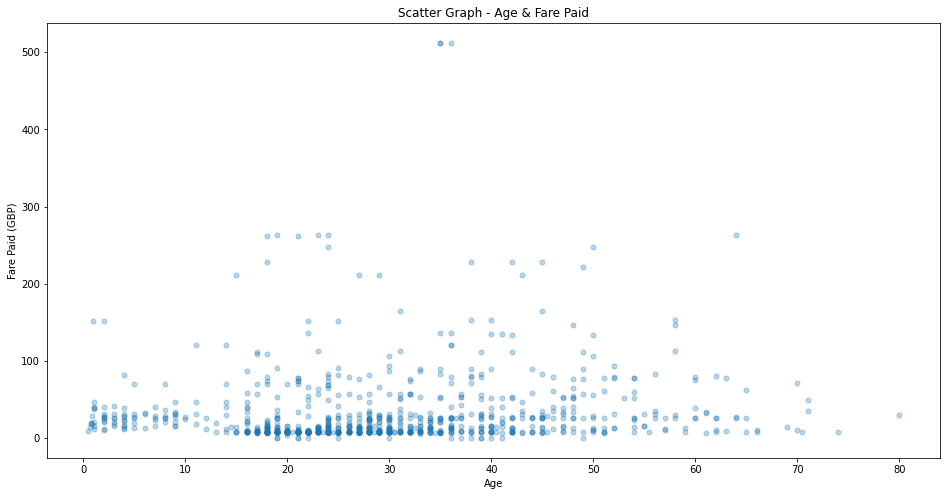

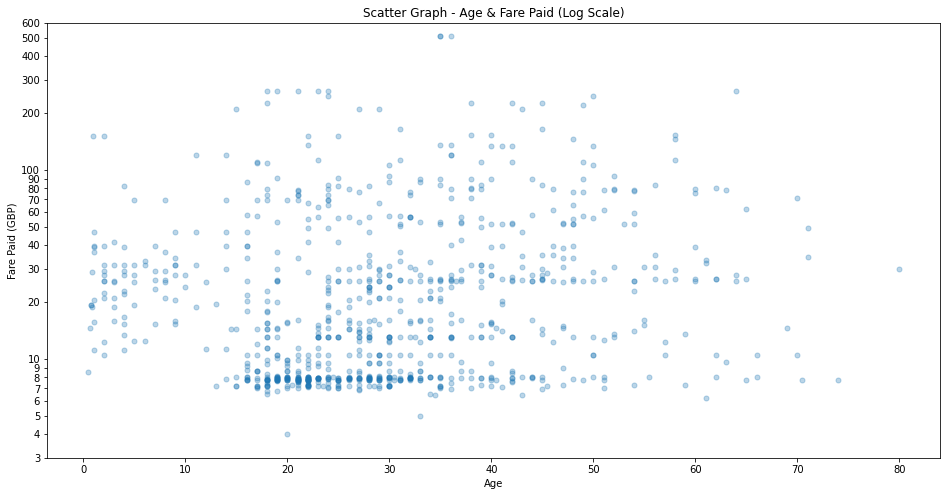

In [ ]:
#First graph
x = titanic["Age"]
y = titanic["Fare"]
area = 25

plt.figure(figsize=(16, 8))
plt.scatter(x, y, s=area, alpha=0.3)

plt.title("Scatter Graph - Age & Fare Paid")
plt.xlabel("Age")
plt.ylabel("Fare Paid (GBP)")

plt.show()

#Second graph - using a log scale on the y-axis
plt.figure(figsize=(16, 8))
plt.scatter(x, y, s=area, alpha=0.3)

plt.title("Scatter Graph - Age & Fare Paid (Log Scale)")
plt.xlabel("Age")
plt.ylabel("Fare Paid (GBP)")

plt.yscale('log')
y_values = [3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600]
plt.yticks(y_values, ['%d' % val for val in y_values])
plt.ylim(3, 600)

plt.show()

---
By setting the c (colours) variable in the scatter function to the class of passenger, we can have the points on the graph's colour correspond to each respective class. We can acquire a legend through either plotting each of the three scatter plots seperately and keeping the objects to use in the legend function, or in this case, specifying the legend using mlines from matplotlib, and writing the key in there.

From the graph, we can generally see that from the age of 16 upwards, there is a fairly level split of which class people are in. The gray line on the graph drawn using **vlines** splits out the under 16s from the rest of the group. To the left of that line, there is a perceptible difference in both the distribution of the ticket prices, as well as the proportions of each ticket class.

Given that we saw the average ticket price of the young passengers was very close to the adult price, and that they are largely travelling at third class, it could be said that they are getting a particularly bad deal!

Although there is that difference between the two sides of the line which has been brought to light by this graph, it does not necessarily show that there is a direct link between the passenger's age and the ticket price itself, other than the two age brackets. 


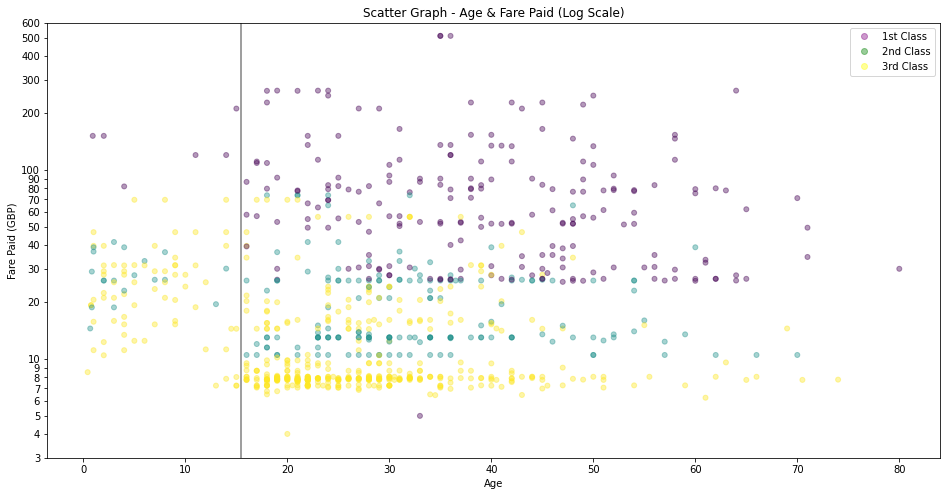

In [ ]:
x = titanic["Age"]
y = titanic["Fare"]
colours = titanic["Pclass"]
area = 25 

plt.figure(figsize=(16, 8))
plt.scatter(x, y, s=area, c=colours, alpha=0.4)

plt.title("Scatter Graph - Age & Fare Paid (Log Scale)")
plt.xlabel("Age")
plt.ylabel("Fare Paid (GBP)")

plt.yscale('log')
y_values = [3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600]
plt.yticks(y_values, ['%d' % val for val in y_values])
plt.ylim(3, 600)

import matplotlib.lines as mlines

three = mlines.Line2D([], [], color='yellow', marker='o', ls='', label='3rd Class', alpha=0.4)
two = mlines.Line2D([], [], color='green', marker='o', ls='', label='2nd Class', alpha=0.4)
one = mlines.Line2D([], [], color='purple', marker='o', ls='', label='1st Class', alpha=0.4)
plt.legend(handles=[one, two, three])

plt.vlines(x = 15.5, ymin = 3, ymax = 600, colors = 'gray')
plt.show()

---
We can use the stats.linregress function to see if there is a relation between two features. It will provide a "tuple" - a data type containing five "packed objects" which can be unpacked by assigning five variables to the output. In this case, we are most interested in the r value, which we can multiply by itself to provide the r squared value - a measure of correlation.

An r squared value can be between 0 and 1, where 1 means that all of the variation is explained by the best fit linear regression model, and 0 means that none of it is explained. An r squared value of less than 0.5 generally indicates a weak correlation, and our value of 0.0126 indicates that there is no correlation whatsoever!

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(titanic["Age"], titanic["Fare"])
print(f"r-squared:, {r_value**2}")

r-squared:, 0.012617722690146617


---
#Section 3

#Fares Paid & Passenger Survival

In this section, we will look whether there is a correlation between price paid for a ticket, and whether the age of the passenger survived. We will also  explore the data behind the class of each passenger in greater depth.

A good first step would be to determine how many passengers were in each class, which can be done using the column name and "value_counts()" method. We can see that most passengers in the dataframe travelled third class.

In [ ]:
titanic["Pclass"].value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

---
To quickly retrieve the average fare paid by class, we can use the .groupby() method on the Pclass column in conjuction with the .mean() method, to return a table of the mean values based on that grouping, and assign it to class_groups.

Since we're looking for the average fare paid, we can then refer to the fare column of our newly created dataframe.

In [ ]:
class_groups = titanic.groupby("Pclass").mean()
class_groups["Fare"]

Pclass
1    84.154687
2    20.662183
3    13.707707
Name: Fare, dtype: float64

---
We can get more information about the fares paid by each class by using a box plot graph. First, we can create an array object, comprised of the fares paid by each respective class. As the underlying array lengths differ (the number of first, second and third class passengers are not equal) - the dtype is set to "object"

The array object is then input into the boxplot, which shows a stark difference in fares between first class and the other classes, though the difference between the lower two classes is much less clear. We can see a lot of outliers above the whisker for the third class passengers. (The whisker is drawn at the 75th percentile plus 1.5 times the interquartile range (the difference between the 25th and 75th percentile) 

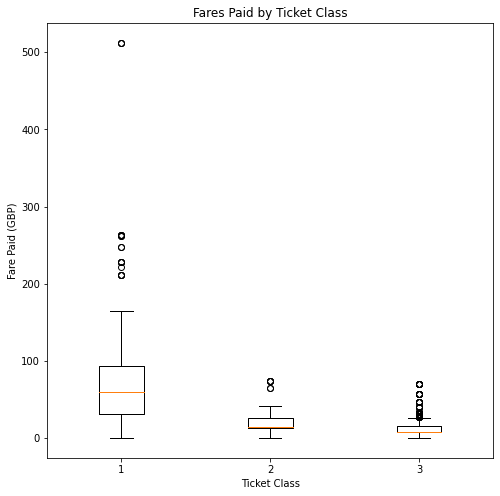

In [ ]:
data = np.array([titanic[titanic["Pclass"] == 1]["Fare"], titanic[titanic["Pclass"] == 2]["Fare"], titanic[titanic["Pclass"] == 3]["Fare"]], dtype=object)

fig, ax = plt.subplots(figsize=(8, 8))
ax.boxplot(data)

ax.set_title("Fares Paid by Ticket Class")
ax.set_xlabel("Ticket Class")
ax.set_ylabel("Fare Paid (GBP)")

plt.show()


---
A graph from the Seaborn library which can provide further insight into the distribution is the Violin plot.

In the plot below, the following steps are taken:
- Input the same data for the box plot. (x = Fare, y = Passenger Class)
- Cut the data off where it actually begins. (cut=0)
- Scaled the area of the violins according to the number of data points in each class. (scale='count')
- Oriented the graph horizontally to make better use of screen space. (orient='h')
- Set the object to draw the plot onto. (ax=ax)

From it, you can see the same points on the boxplot, contained within the violin. The white dots appear at the median points, and the nature of the positive skew in the data is clear to see as well. 

There is a highlighted section for the £15 to £40 range using the plt.axvspan function. Although the price points for second and third class passengers are quite close below the median, this particular plot makes the differences in fares paid between the 50th and 90th percentiles of each group much clearer to see.

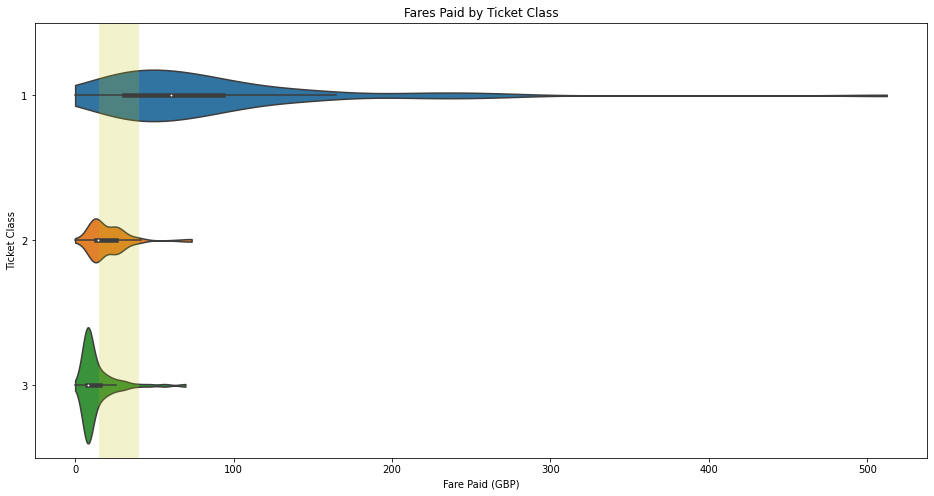

In [ ]:
fare_class_violin, ax = plt.subplots(figsize=(16, 8))
fare_class_violin = sns.violinplot(x=titanic["Fare"], y=titanic["Pclass"], cut=0, scale='count', orient='h', ax=ax)

ax.set_title("Fares Paid by Ticket Class")
ax.set_xlabel("Fare Paid (GBP)")
ax.set_ylabel("Ticket Class")

plt.axvspan(15, 40, color='y', alpha=0.2, lw=0)
plt.show()

It is clear there is a link between the fare paid, and what class the passengers were travelling, but does this make a difference in the context of survival? We can directly query what the survival rates were for a first class passenger in a similar way to earlier queries we have run.

This time, we can make use of the **&** to specify two conditions on the numerator of this division, looking at people who travelled first class and survived as a percentage of all people who travelled first class.

The figure of 63% exceeds the average survival rate we found earlier of 38.6%, so this does provide some indication of survival being linked to the fare paid. 

In [ ]:
first_class_survival = len(titanic[(titanic["Survived"] == 1) & (titanic["Pclass"] == 1)]) / len(titanic[titanic["Pclass"] == 1])
print(f"{first_class_survival:.1%}")

63.0%


---
In the same manner, we can look at the proportion of people who paid less than £10 who survived - which comes out below the average survival rate of 38.6%

In [ ]:
low_fare_survival = len(titanic[(titanic["Survived"] == 1) & (titanic["Fare"] < 10)]) / len(titanic[titanic["Fare"] < 10])
print(f"{low_fare_survival:.1%}")

20.1%


---
Using a similar method as before to construct a boxplot, we can observe the fares paid for passengers who survived, and those who did not. **xticks** is used to give an appropriate alias to both groups on the plot.

A horizontal highlighted section has been applied using axhspan, similarly to the axvspan used in the violin plot. Using it to highlight the interquartile range of the deceased passengers, we can see that the surviving passengers paid a greater fare - with the 50th percentile of the survivors' fare roughly lining up with the 75th percentile of the deceased's fare.


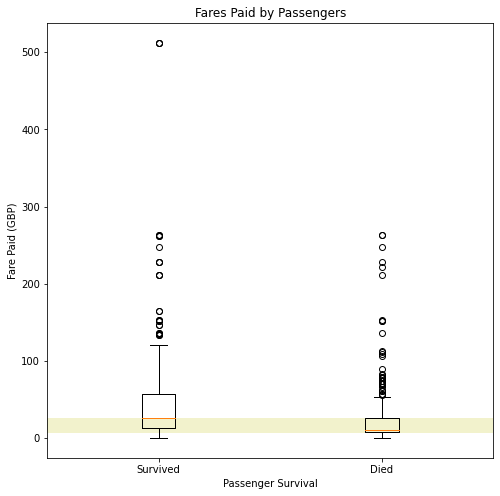

In [ ]:
data = np.array([titanic[titanic["Survived"]==1]["Fare"], titanic[titanic["Survived"]==0]["Fare"]], dtype=object)

fig, ax = plt.subplots(figsize=(8, 8))

ax.set_title('Fares Paid by Passengers')
ax.set_xlabel("Passenger Survival")
ax.set_ylabel("Fare Paid (GBP)")
ax.boxplot(data)

plt.axhspan(7, 26, color='y', alpha=0.2, lw=0)
plt.xticks([1, 2], ['Survived', 'Died'])

plt.show()

---
We can perform statistical tests to formally observe the difference in fares between the two groups. 

First, we must test each group to see if it fits a normal distribution. (The data fits symmetrically above and below the mean - with more occurences taking place where data points are near the mean value) If the data approximately fits a normal distribution, we can use a parametric test which assumes normality of the datasets. If it does not, we would use a non-parametric test which does not

We can run a Shapiro-Wilk test for normality using each group, using **stats.shapiro** - the higher the second value is, the more likely it is that the data is normally distributed. In a context such as this, being over 0.05 can be used as a benchmark for if the data is normally distributed. In this case, both values are many orders of magnitude below that value, and so we reject the hypothesis that the data is normally distributed. 

To compare two groups which are normally distributed, we would use the **ttest_ind()** test. As these groups are not, we can use the **mannwhitneyu()** test instead. Once again, the second value is our indicator for statistical significance, where 0.05 would indicate there is just a 5% chance that the statistical difference between the datasets was coincidental. In this context, we receive another negliably small value - to put the value into context, the odds of the datasets being so different by coincidence are fairly close to the odds of winning the UK National Lottery thrice in a row.

In [ ]:
print(stats.shapiro(titanic[titanic["Survived"] == 1]["Fare"]))
print(stats.shapiro(titanic[titanic["Survived"] == 0]["Fare"]))
stats.mannwhitneyu(titanic[titanic["Survived"] == 1]["Fare"], titanic[titanic["Survived"] == 0]["Fare"])

(0.5967270135879517, 1.8337420335182354e-27)
(0.5145274996757507, 4.564138422006922e-36)


MannwhitneyuResult(statistic=57578.0, pvalue=4.307135455293686e-22)

---
# Section 4

#Demographics and Survival

We finally will review whether women and/or children (anyone under 18) had a better chance of survival.

We can make some subsets of the dataframe and assign them to each group. Then, similarly to earlier queries, we can see what proportion of each group survived and present them in an f string.

Our initial findings show that men were significantly worse off than women in terms of their survival - truly living up to the "women and children first" conduct - the Birkenhead drill as it is called, apparently!

In [ ]:
women = titanic[(titanic["Age"] >= 18) & (titanic["Sex"] == "female")] 
men = titanic[(titanic["Age"] >= 18) & (titanic["Sex"] == "male")] 
children = titanic[(titanic["Age"] < 18)] 

female_survival_rate = len(women[women["Survived"] == 1]) / len(women)
print(f"The survival rate of women was {female_survival_rate:.1%}")

male_survival_rate = len(men[men["Survived"] == 1]) / len(men)
print(f"The survival rate of men was {male_survival_rate:.1%}")

child_survival_rate = len(children[children["Survived"] == 1]) / len(children)
print(f"The survival rate of children was {child_survival_rate:.1%}")

The survival rate of women was 76.9%
The survival rate of men was 16.6%
The survival rate of children was 50.0%


---
Earlier, we discovered that there was a link to paying a greater fare/having a higher class ticket and surviving. We can check each group to find out the average class each of the groups travelled in. 

Children were worst off here, and the women group had the highest class tickets on average. This could go towards explaining why a larger proportion of women survived than children. 

In [ ]:
female_ticket_class = women["Pclass"].mean()
print(f"The average ticket class of women was {female_ticket_class:.3}")

male_ticket_class = men["Pclass"].mean()
print(f"The average ticket class of men was {male_ticket_class:.3}")

child_ticket_class = children["Pclass"].mean()
print(f"The average ticket class of children was {child_ticket_class:.3}")

The average ticket class of women was 2.06
The average ticket class of men was 2.34
The average ticket class of children was 2.64


---
We can use the pd.crosstab() function to create a table giving the split between each demographic, and whether they survived.

An initial step required is to make a field for the demographic in question, as currently, the Sex column only classifies men and women. This is done by using  **np.where** to create the column conditionally.


In [ ]:
titanic["Demographic"] = np.where(titanic["Age"] >= 18, titanic["Sex"], "child")

titanic_crosstab = pd.crosstab(titanic["Survived"], titanic["Demographic"])
titanic_crosstab

Demographic,child,female,male
Survived,,,
0,65,58,422
1,65,193,84


---
We can get the proportion of the survivors and the deceased by normalising the data as below, which transforms the data and provides each row's entries as a proportion of the total.

As an example, of the people who died (Survived = 0), men made up just over 77.4% of the deceased.

In [ ]:
titanic_crosstab_transformation = pd.crosstab(titanic["Survived"], titanic["Demographic"], normalize='index')
titanic_crosstab_transformation

Demographic,child,female,male
Survived,,,
0,0.119266,0.106422,0.774312
1,0.190058,0.564327,0.245614


---
We can use seaborn to create a heatmap of the data in question. As the data has been normalised, it highlights where the highest proportion of survivors/deceased are, whereas a non-normalised heatmap would have highlighted the largest demographics as a whole.

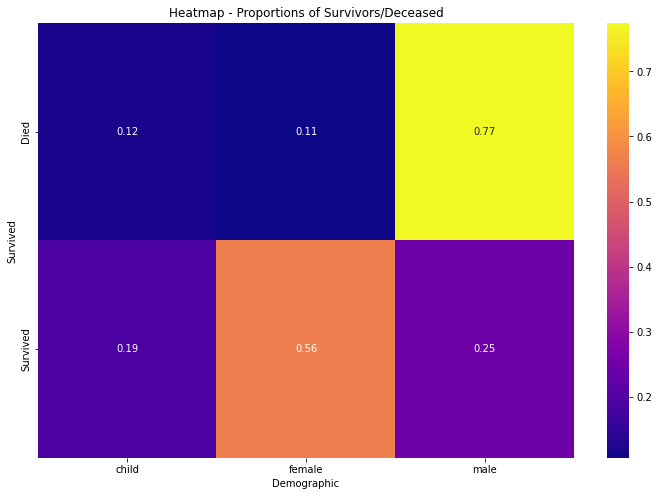

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
survival_heatmap = sns.heatmap(titanic_crosstab_transformation, annot=True, cmap="plasma")

plt.yticks([0.5, 1.5], ['Died', 'Survived'])
ax.set_title("Heatmap - Proportions of Survivors/Deceased")

plt.show()

---
Finally, as with the other sections, we can use a statistical test as a formal affirmation of what we have found. This time, the stats.chi2_contingency() returns a tuple of length 4, where the p value represents the significance of whether there is a correlation between survival and the demographics of the person in question.

In this case, once again, the p value confirms a signficanct correlation between the two variables.

In [ ]:
chi2, p, dof, exp = stats.chi2_contingency(titanic_crosstab)
print(p)

1.864257022079571e-58
